<a href="https://colab.research.google.com/github/lvlanson/data_mining/blob/main/Praktikum_2/Praktikum_2_Aufgabe_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Funktion um Dataframes komplett anzuzeigen

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [3]:
# Laden der Daten im CSV Format

import pandas as pd

url    = "https://raw.githubusercontent.com/lvlanson/data_mining/main/Praktikum_2/Bodyfat.csv"
data_frame = pd.read_csv(url, sep=";", error_bad_lines=False)

In [3]:
data_frame.head()

,Dichte,Koerperfettanteil,Alter,Gewicht_lbs,Groesse_inch,Nackenumfang,Brustumfang,Bauchumfang,Hueftumfang,Obschenkelumfang,Knieumfang,Fussgelenkumfang,Oberarmumfang,Unterarmumfang,Handgelenkumfang
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
# Tabellarische Anzeige der Daten

from IPython.display import display

#display(data_frame)
print_full(data_frame)

                  Dichte    Koerperfettanteil  Alter          Gewicht_lbs         Groesse_inch         Nackenumfang          Brustumfang          Bauchumfang          Hueftumfang     Obschenkelumfang           Knieumfang     Fussgelenkumfang        Oberarmumfang       Unterarmumfang     Handgelenkumfang
0                   1.07                12.30     23               154.25                67.75                36.20                93.10                85.20                94.50                59.00                37.30                21.90                32.00                27.40                17.10
1                   1.09                 6.10     22               173.25                72.25                38.50                93.60                83.00                98.70                58.70                37.30                23.40                30.50                28.90                18.20
2                   1.04                25.30     22               154.00            

In [5]:
# Alle Datenpunkte anzeigen lassen
data_frame.dtypes

Dichte               float64
Koerperfettanteil    float64
Alter                  int64
Gewicht_lbs          float64
Groesse_inch         float64
Nackenumfang         float64
Brustumfang          float64
Bauchumfang          float64
Hueftumfang          float64
Obschenkelumfang     float64
Knieumfang           float64
Fussgelenkumfang     float64
Oberarmumfang        float64
Unterarmumfang       float64
Handgelenkumfang     float64
dtype: object

In [6]:
# Den Datenpunkt Gewicht näher beschreiben
data_frame.Gewicht_lbs.describe()

count    252.000000
mean     178.924405
std       29.389160
min      118.500000
25%      159.000000
50%      176.500000
75%      197.000000
max      363.150000
Name: Gewicht_lbs, dtype: float64

In [7]:
data_frame.Gewicht_lbs.value_counts(normalize=True)

177.25    0.011905
172.75    0.011905
184.25    0.011905
170.75    0.011905
152.25    0.011905
            ...   
147.75    0.003968
174.50    0.003968
169.50    0.003968
126.50    0.003968
154.25    0.003968
Name: Gewicht_lbs, Length: 197, dtype: float64

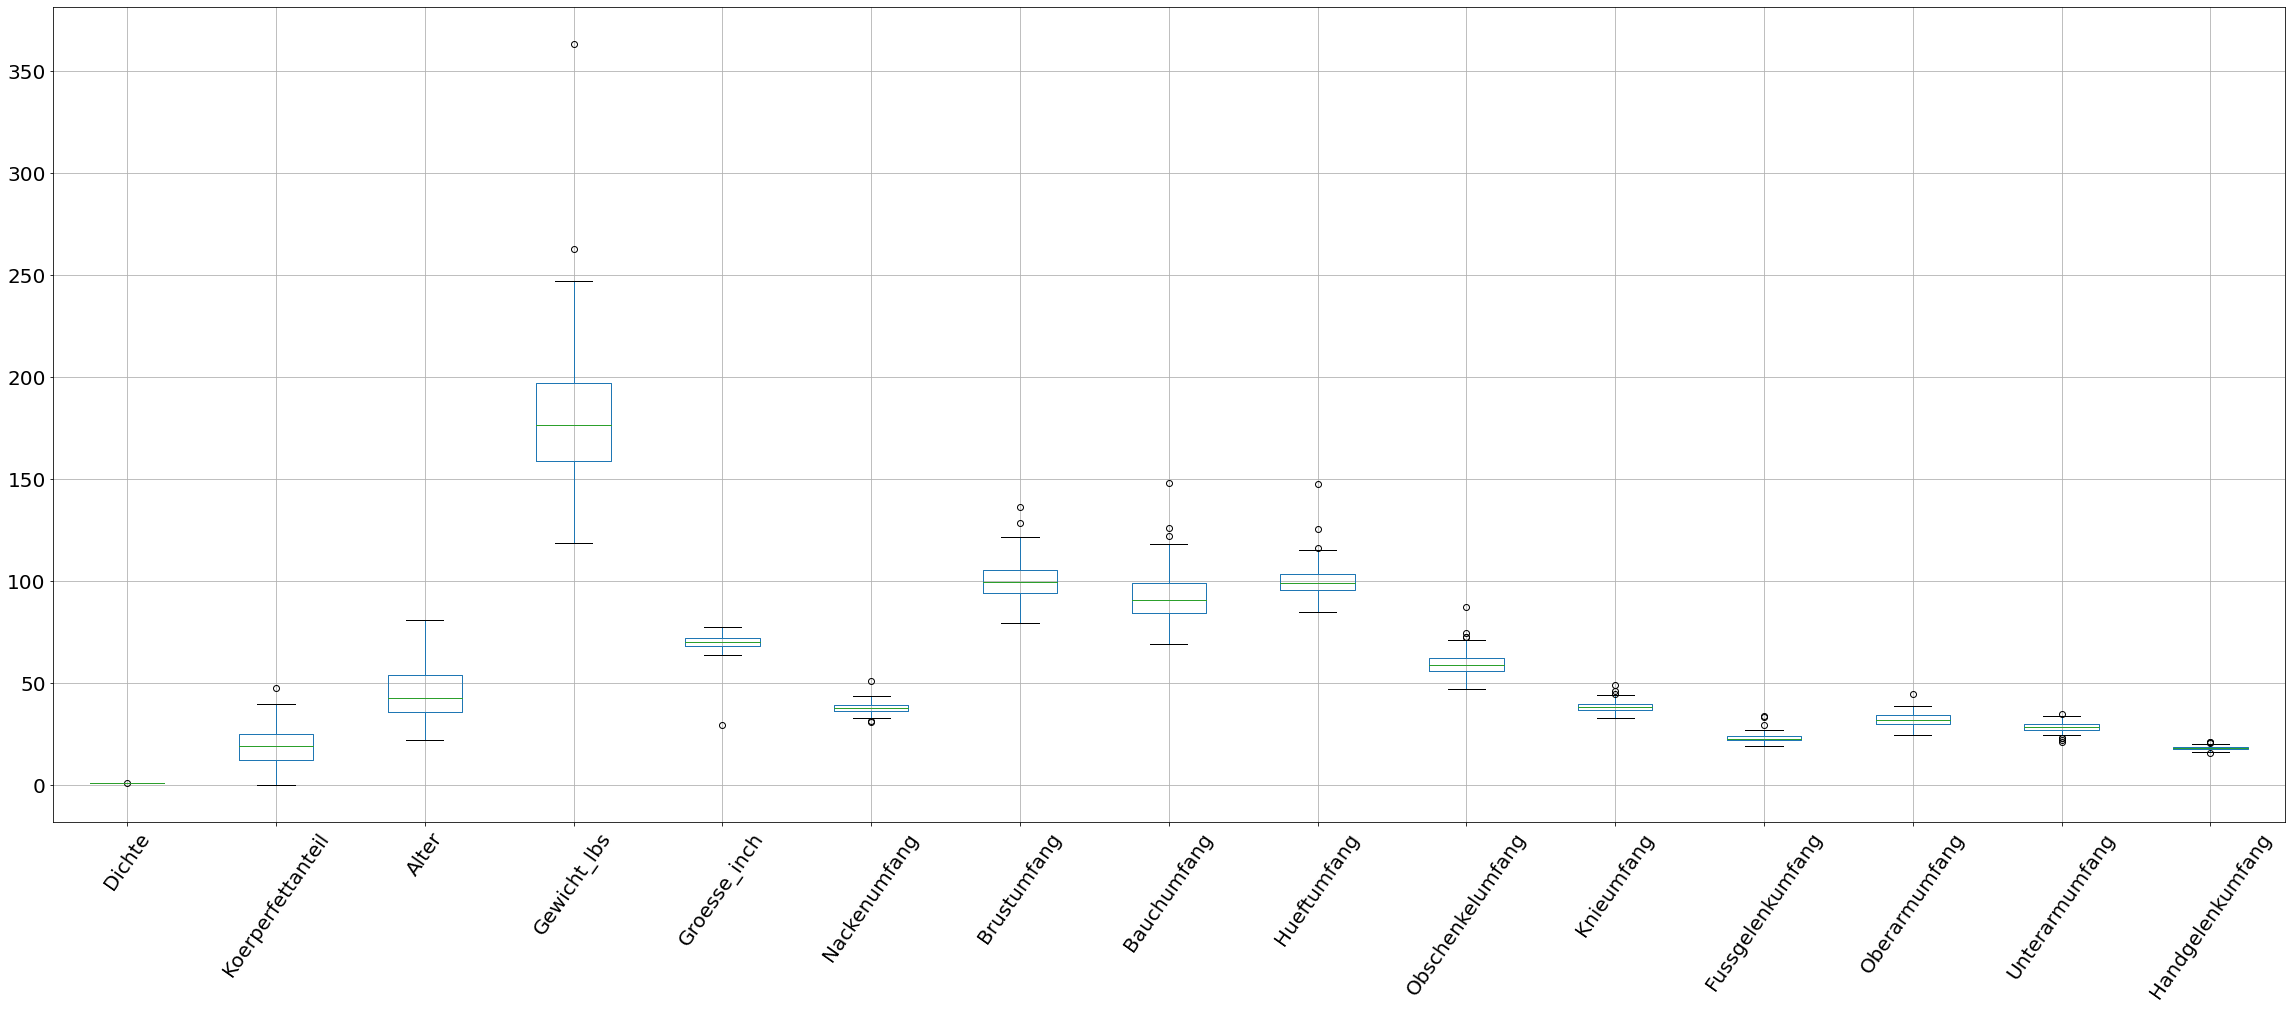

In [8]:
# Boxplot der Daten

data_frame.boxplot(figsize=(40,15), fontsize=20, grid=True, rot=55)

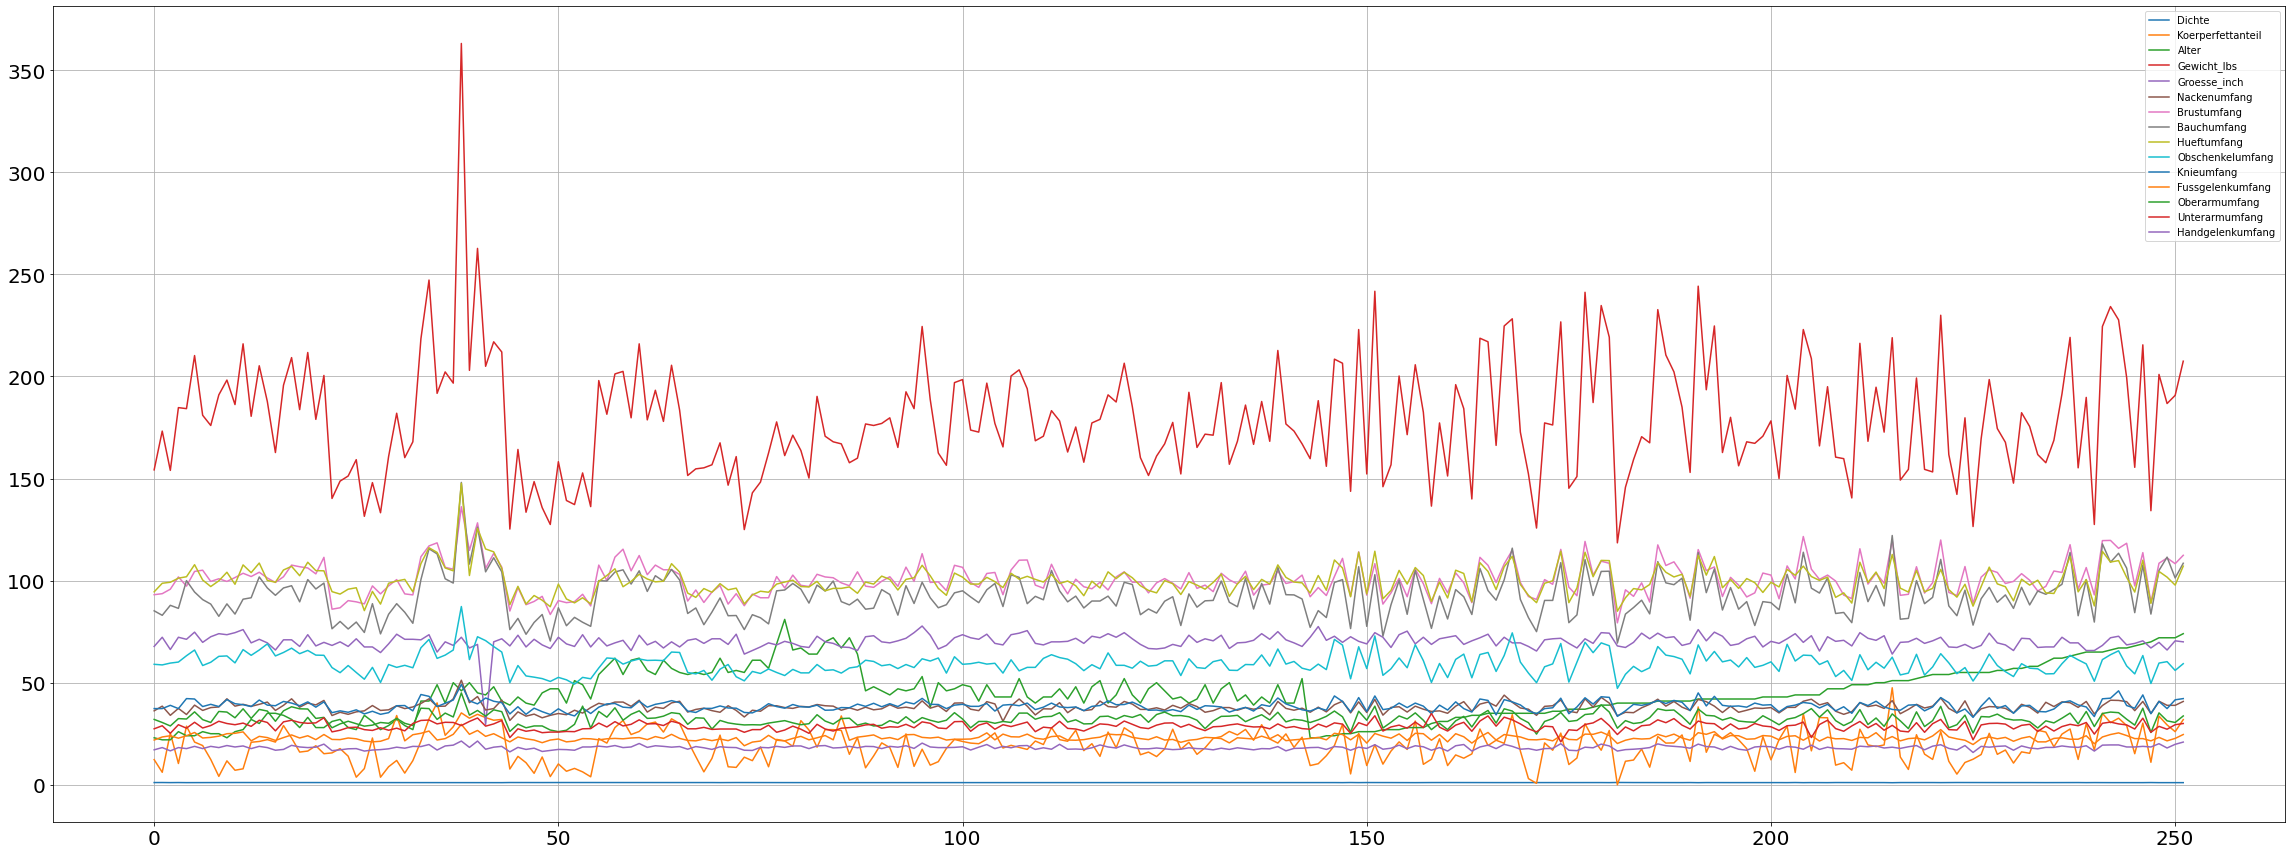

In [9]:
data_frame.plot(figsize=(40,15), fontsize=02, grid=True)

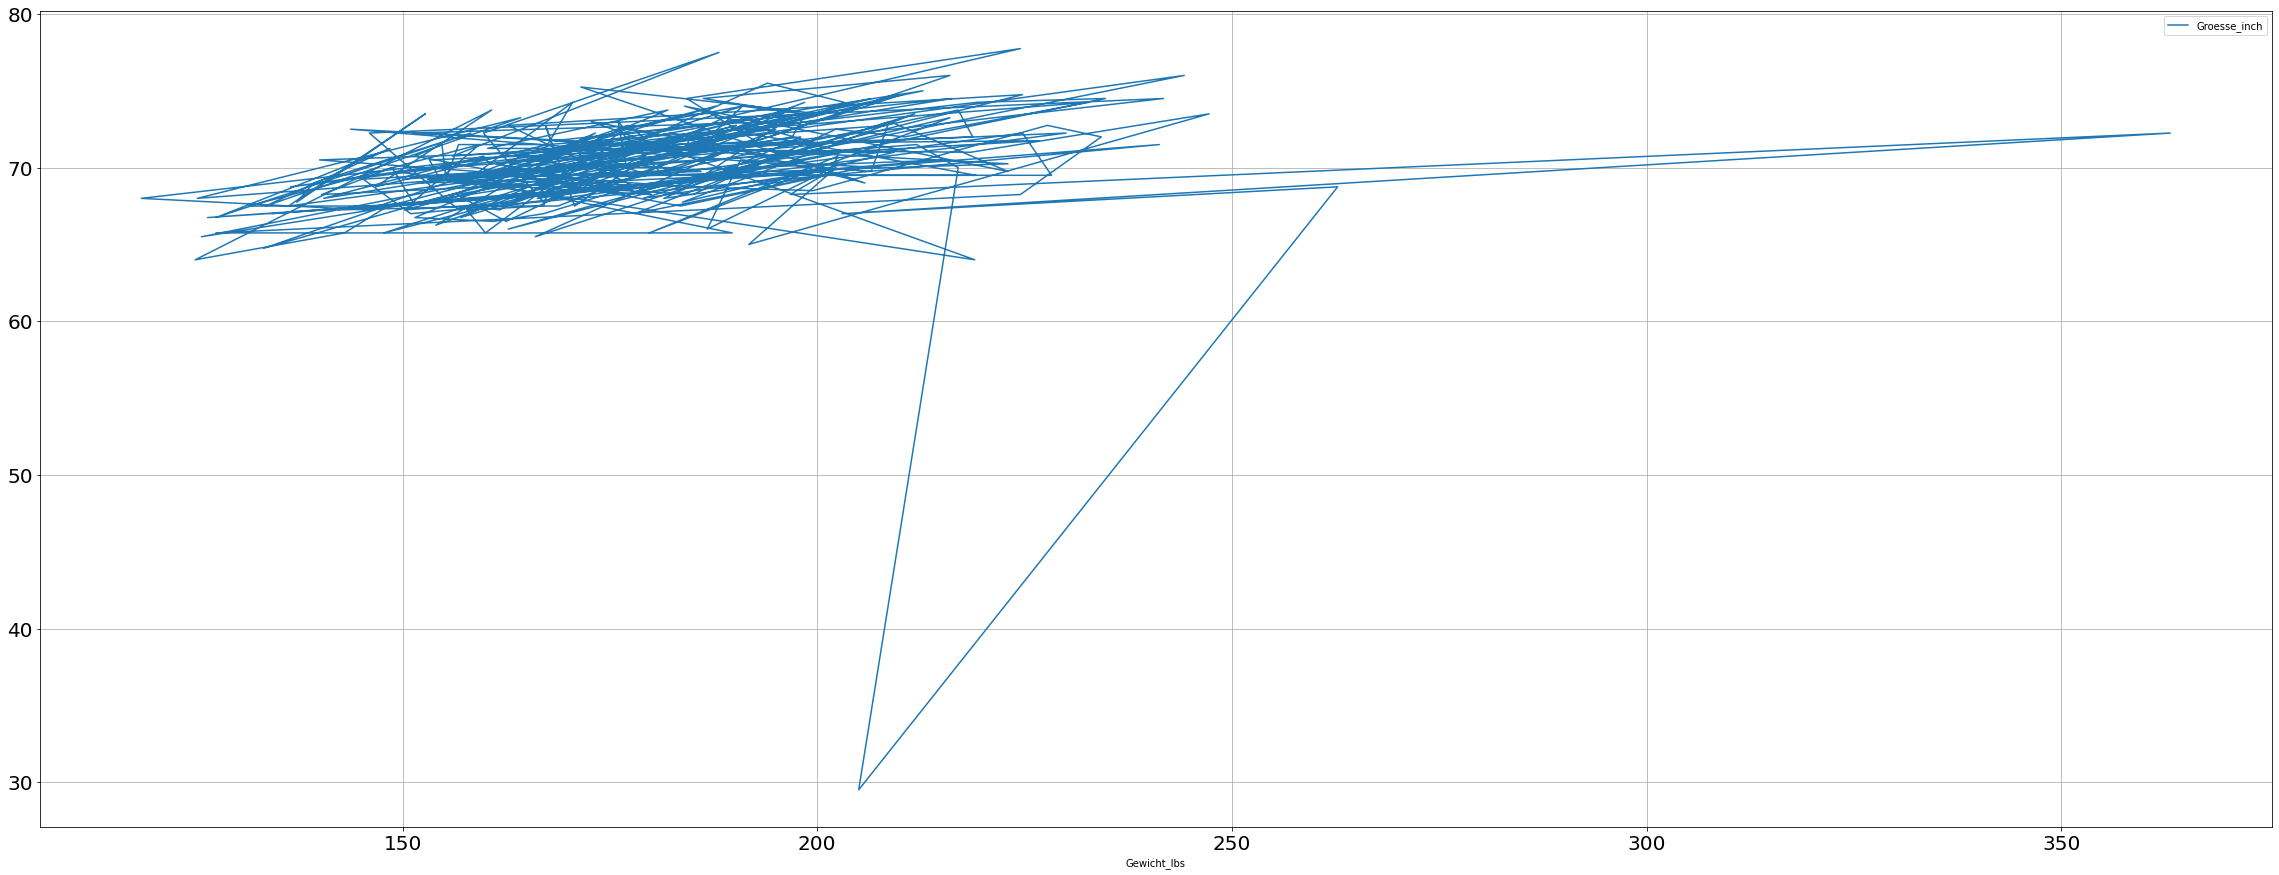

In [10]:
data_frame.plot(figsize=(40,15), fontsize=20, grid=True, x="Gewicht_lbs", y="Groesse_inch")

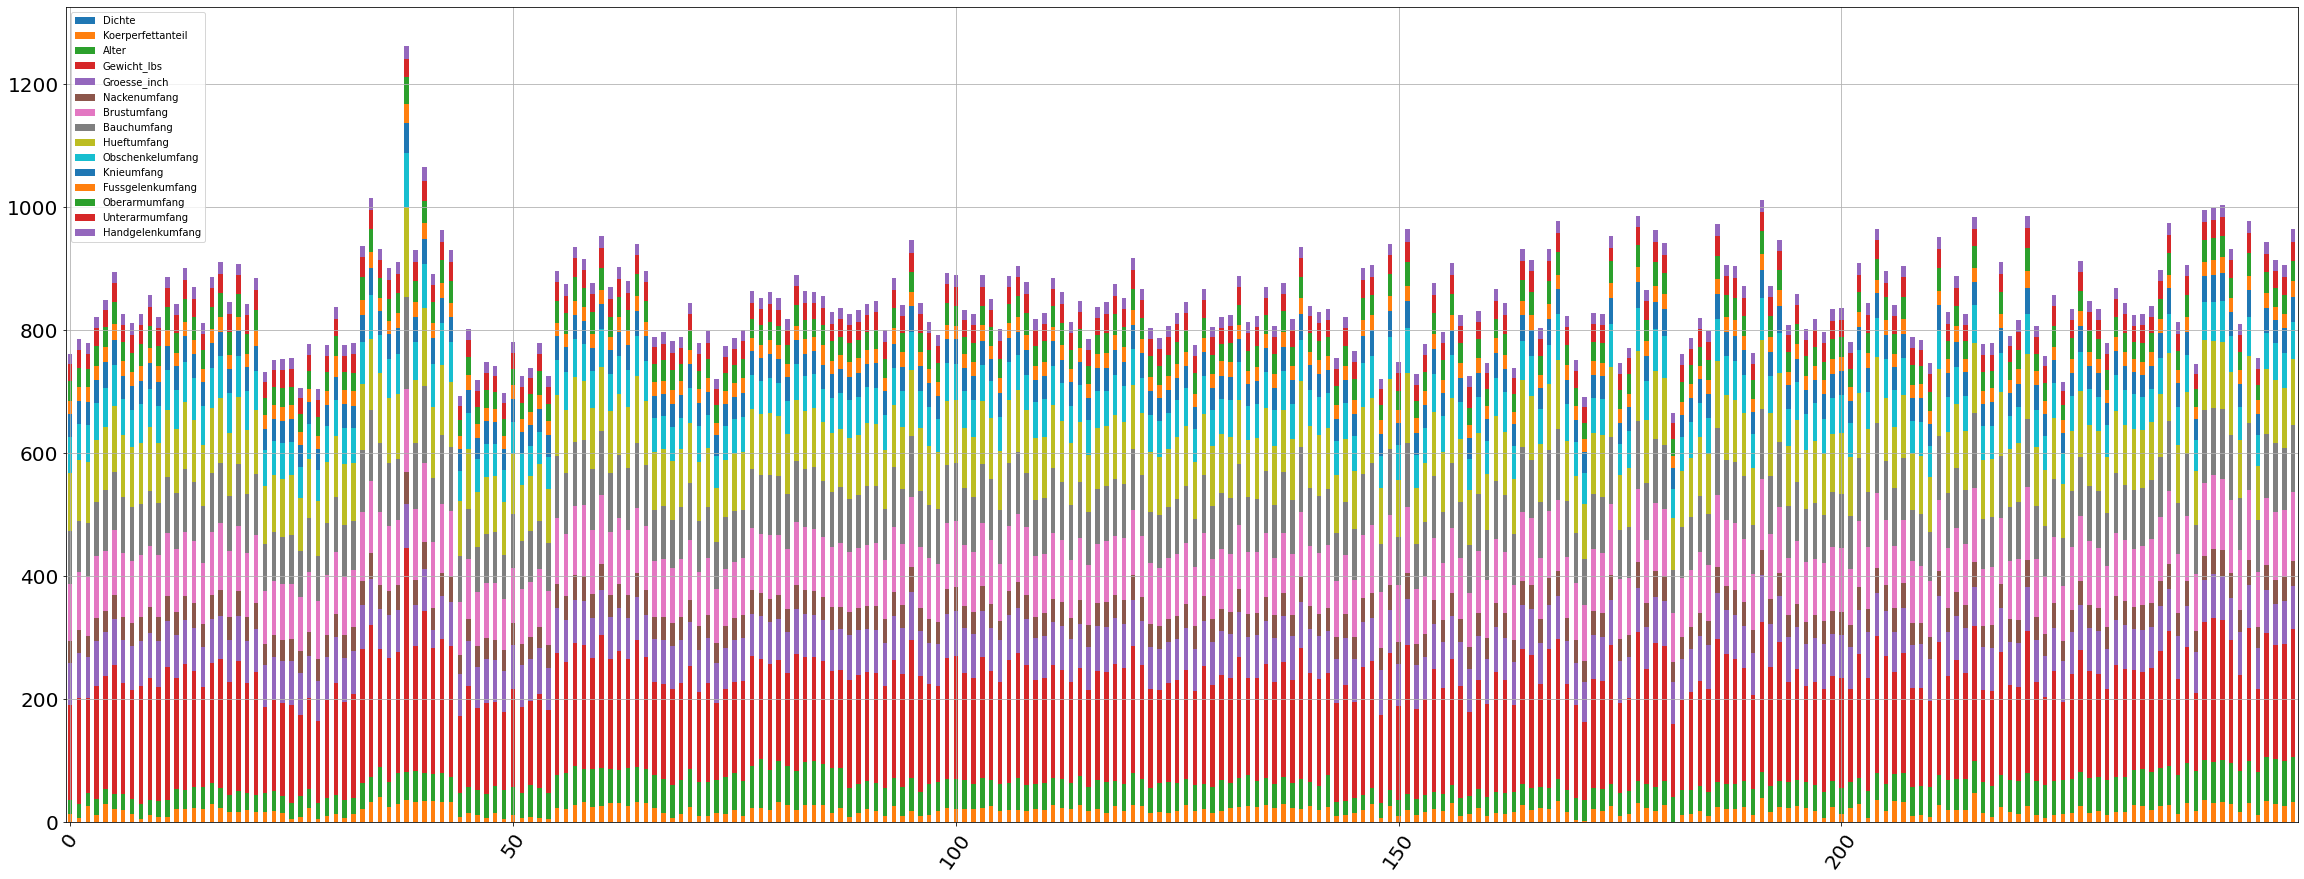

In [11]:
data_frame.plot.bar(figsize=(40,15), fontsize=20, grid=True, rot=55, stacked=True, xticks=[x for x in range(0,250,50)])

In [12]:
# c) Warum ist es nicht sinnvoll, die Dichte für eine Regressionsgerade (Modell) heranzuziehen?
# Gucken wir uns mal die Dichte an

print("Value Counts")
print(data_frame.Dichte.value_counts())
print("\nDescription")
print(data_frame.Dichte.describe())
print

Value Counts
1.0610    4
1.0524    3
1.0414    3
1.0484    3
1.0742    2
         ..
1.0873    1
1.0434    1
1.0926    1
1.0510    1
1.0256    1
Name: Dichte, Length: 218, dtype: int64

Description
count    252.000000
mean       1.055574
std        0.019031
min        0.995000
25%        1.041400
50%        1.054900
75%        1.070400
max        1.108900
Name: Dichte, dtype: float64


<function print>

In [13]:
# f) Zusammenhang Körpergewicht und Körpergröße


X_train = data_frame.Groesse_inch.to_numpy().reshape(-1,1)
y_train = data_frame.Gewicht_lbs.to_numpy()

print(X_train)

[[67.75]
 [72.25]
 [66.25]
 [72.25]
 [71.25]
 [74.75]
 [69.75]
 [72.5 ]
 [74.  ]
 [73.5 ]
 [74.5 ]
 [76.  ]
 [69.5 ]
 [71.25]
 [69.5 ]
 [66.  ]
 [71.  ]
 [71.  ]
 [67.75]
 [73.5 ]
 [68.  ]
 [69.75]
 [68.25]
 [70.  ]
 [67.75]
 [71.5 ]
 [67.5 ]
 [67.5 ]
 [64.75]
 [69.  ]
 [73.75]
 [71.25]
 [71.25]
 [71.  ]
 [73.5 ]
 [65.  ]
 [70.  ]
 [68.25]
 [72.25]
 [67.  ]
 [68.75]
 [29.5 ]
 [70.  ]
 [71.5 ]
 [68.  ]
 [73.25]
 [67.5 ]
 [71.25]
 [68.5 ]
 [66.75]
 [72.25]
 [69.  ]
 [67.75]
 [73.5 ]
 [67.5 ]
 [72.  ]
 [68.  ]
 [69.5 ]
 [70.75]
 [65.75]
 [73.25]
 [68.5 ]
 [70.25]
 [67.  ]
 [70.  ]
 [67.5 ]
 [70.75]
 [71.5 ]
 [69.25]
 [71.5 ]
 [71.5 ]
 [68.75]
 [73.75]
 [64.  ]
 [65.75]
 [67.5 ]
 [69.5 ]
 [68.5 ]
 [70.25]
 [69.25]
 [67.75]
 [67.25]
 [72.75]
 [70.  ]
 [69.25]
 [67.5 ]
 [67.25]
 [65.75]
 [72.5 ]
 [73.  ]
 [70.  ]
 [69.5 ]
 [70.5 ]
 [71.75]
 [74.5 ]
 [77.75]
 [73.25]
 [66.5 ]
 [68.25]
 [72.  ]
 [73.5 ]
 [72.  ]
 [71.25]
 [73.75]
 [69.25]
 [68.5 ]
 [73.5 ]
 [74.25]
 [75.5 ]
 [69.25]
 [68.5 ]
 

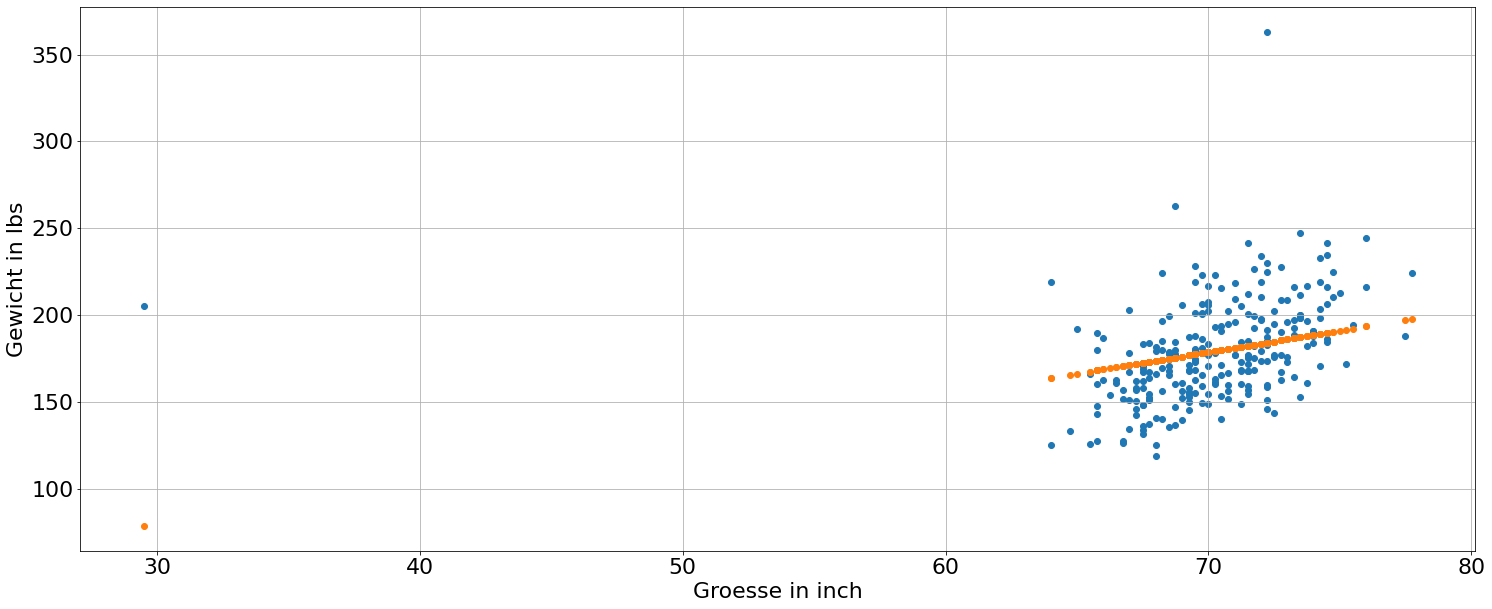

In [14]:
# Regressionsmodell
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(25,10))

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_train)

plt.scatter(X_train, y_train)
plt.scatter(X_train, y_predict)

plt.xlabel("Groesse in inch")
plt.ylabel("Gewicht in lbs")
plt.grid()

In [15]:
# Groesse_inch genauer prüfen
data_frame.Groesse_inch.describe()

# Ausreißer bei 29.5

count    252.000000
mean      70.148810
std        3.662856
min       29.500000
25%       68.250000
50%       70.000000
75%       72.250000
max       77.750000
Name: Groesse_inch, dtype: float64

In [16]:
# Gewicht prüfen
data_frame.Gewicht_lbs.describe()

# Ausreißer bei 118,5 und 363,15

count    252.000000
mean     178.924405
std       29.389160
min      118.500000
25%      159.000000
50%      176.500000
75%      197.000000
max      363.150000
Name: Gewicht_lbs, dtype: float64

In [17]:
# Ausreißer entfernen
data_frame = data_frame.drop(index=data_frame.Groesse_inch.idxmin())
data_frame = data_frame.drop(index=data_frame.Gewicht_lbs.idxmax())
display(data_frame.Groesse_inch)

0      67.75
1      72.25
2      66.25
3      72.25
4      71.25
       ...  
247    67.00
248    69.75
249    66.00
250    70.50
251    70.00
Name: Groesse_inch, Length: 250, dtype: float64

In [18]:
import numpy as np

X_train = data_frame.Groesse_inch.to_numpy().reshape(-1,1)
y_train = data_frame.Gewicht_lbs.to_numpy()

X_train = np.asarray([x for x in X_train if np.logical_not(np.isnan(x))])
y_train = np.asarray([y for y in y_train if np.logical_not(np.isnan(y))])

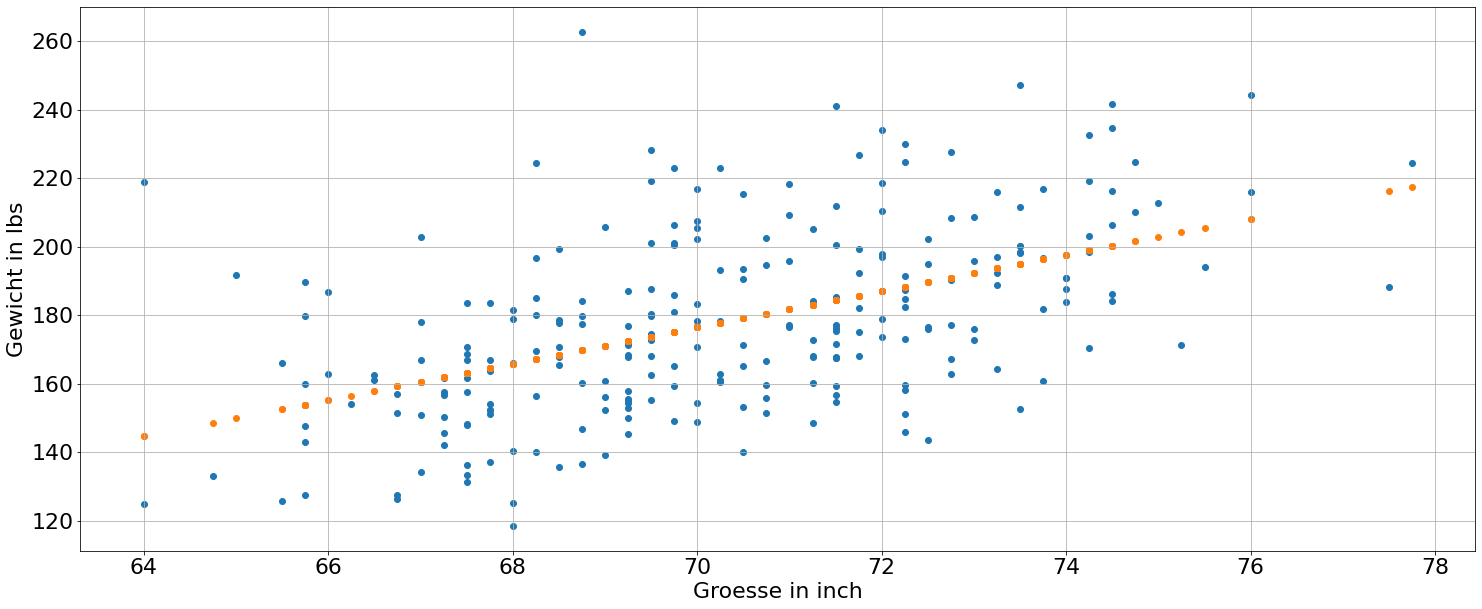

In [19]:
# Regressionsmodell ohne Ausreißer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(25,10))

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_train)

plt.scatter(X_train, y_train)
plt.scatter(X_train, y_predict)
plt.xlabel("Groesse in inch")
plt.ylabel("Gewicht in lbs")
plt.grid()

In [20]:
# Korrelationen als Tabelle anzeigen

data_frame.corr()

,Dichte,Koerperfettanteil,Alter,Gewicht_lbs,Groesse_inch,Nackenumfang,Brustumfang,Bauchumfang,Hueftumfang,Obschenkelumfang,Knieumfang,Fussgelenkumfang,Oberarmumfang,Unterarmumfang,Handgelenkumfang
Dichte,1.000000,-0.987480,-0.280862,-0.598372,0.043423,-0.470465,-0.680275,-0.809042,-0.616443,-0.542792,-0.478874,-0.244258,-0.475840,-0.354636,-0.317813
Koerperfettanteil,-0.987480,1.000000,0.295051,0.617299,-0.029390,0.488524,0.700670,0.823685,0.632675,0.548550,0.492308,0.244556,0.481538,0.364709,0.339008
Alter,-0.280862,0.295051,1.000000,-0.016055,-0.245887,0.118738,0.181815,0.242780,-0.058134,-0.216084,0.017194,-0.109616,-0.044141,-0.085116,0.217506
Gewicht_lbs,-0.598372,0.617299,-0.016055,1.000000,0.512913,0.810014,0.891286,0.873735,0.932691,0.852116,0.842744,0.580906,0.785214,0.683333,0.725104
Groesse_inch,0.043423,-0.029390,-0.245887,0.512913,1.000000,0.324664,0.223590,0.186690,0.396724,0.349590,0.512906,0.394547,0.318573,0.321990,0.396985
Nackenumfang,-0.470465,0.488524,0.118738,0.810014,0.324664,1.000000,0.768811,0.728487,0.707518,0.668847,0.648166,0.434398,0.708525,0.660787,0.731185
Brustumfang,-0.680275,0.700670,0.181815,0.891286,0.223590,0.768811,1.000000,0.910069,0.824908,0.707588,0.697603,0.447086,0.706891,0.599353,0.644477
Bauchumfang,-0.809042,0.823685,0.242780,0.873735,0.186690,0.728487,0.910069,1.000000,0.860517,0.737008,0.710425,0.407464,0.656316,0.530138,0.602325
Hueftumfang,-0.616443,0.632675,-0.058134,0.932691,0.396724,0.707518,0.824908,0.860517,1.000000,0.881130,0.809155,0.521185,0.721649,0.603274,0.626401
Obschenkelumfang,-0.542792,0.548550,-0.216084,0.852116,0.349590,0.668847,0.707588,0.737008,0.881130,1.000000,0.777474,0.503554,0.744016,0.604301,0.543670


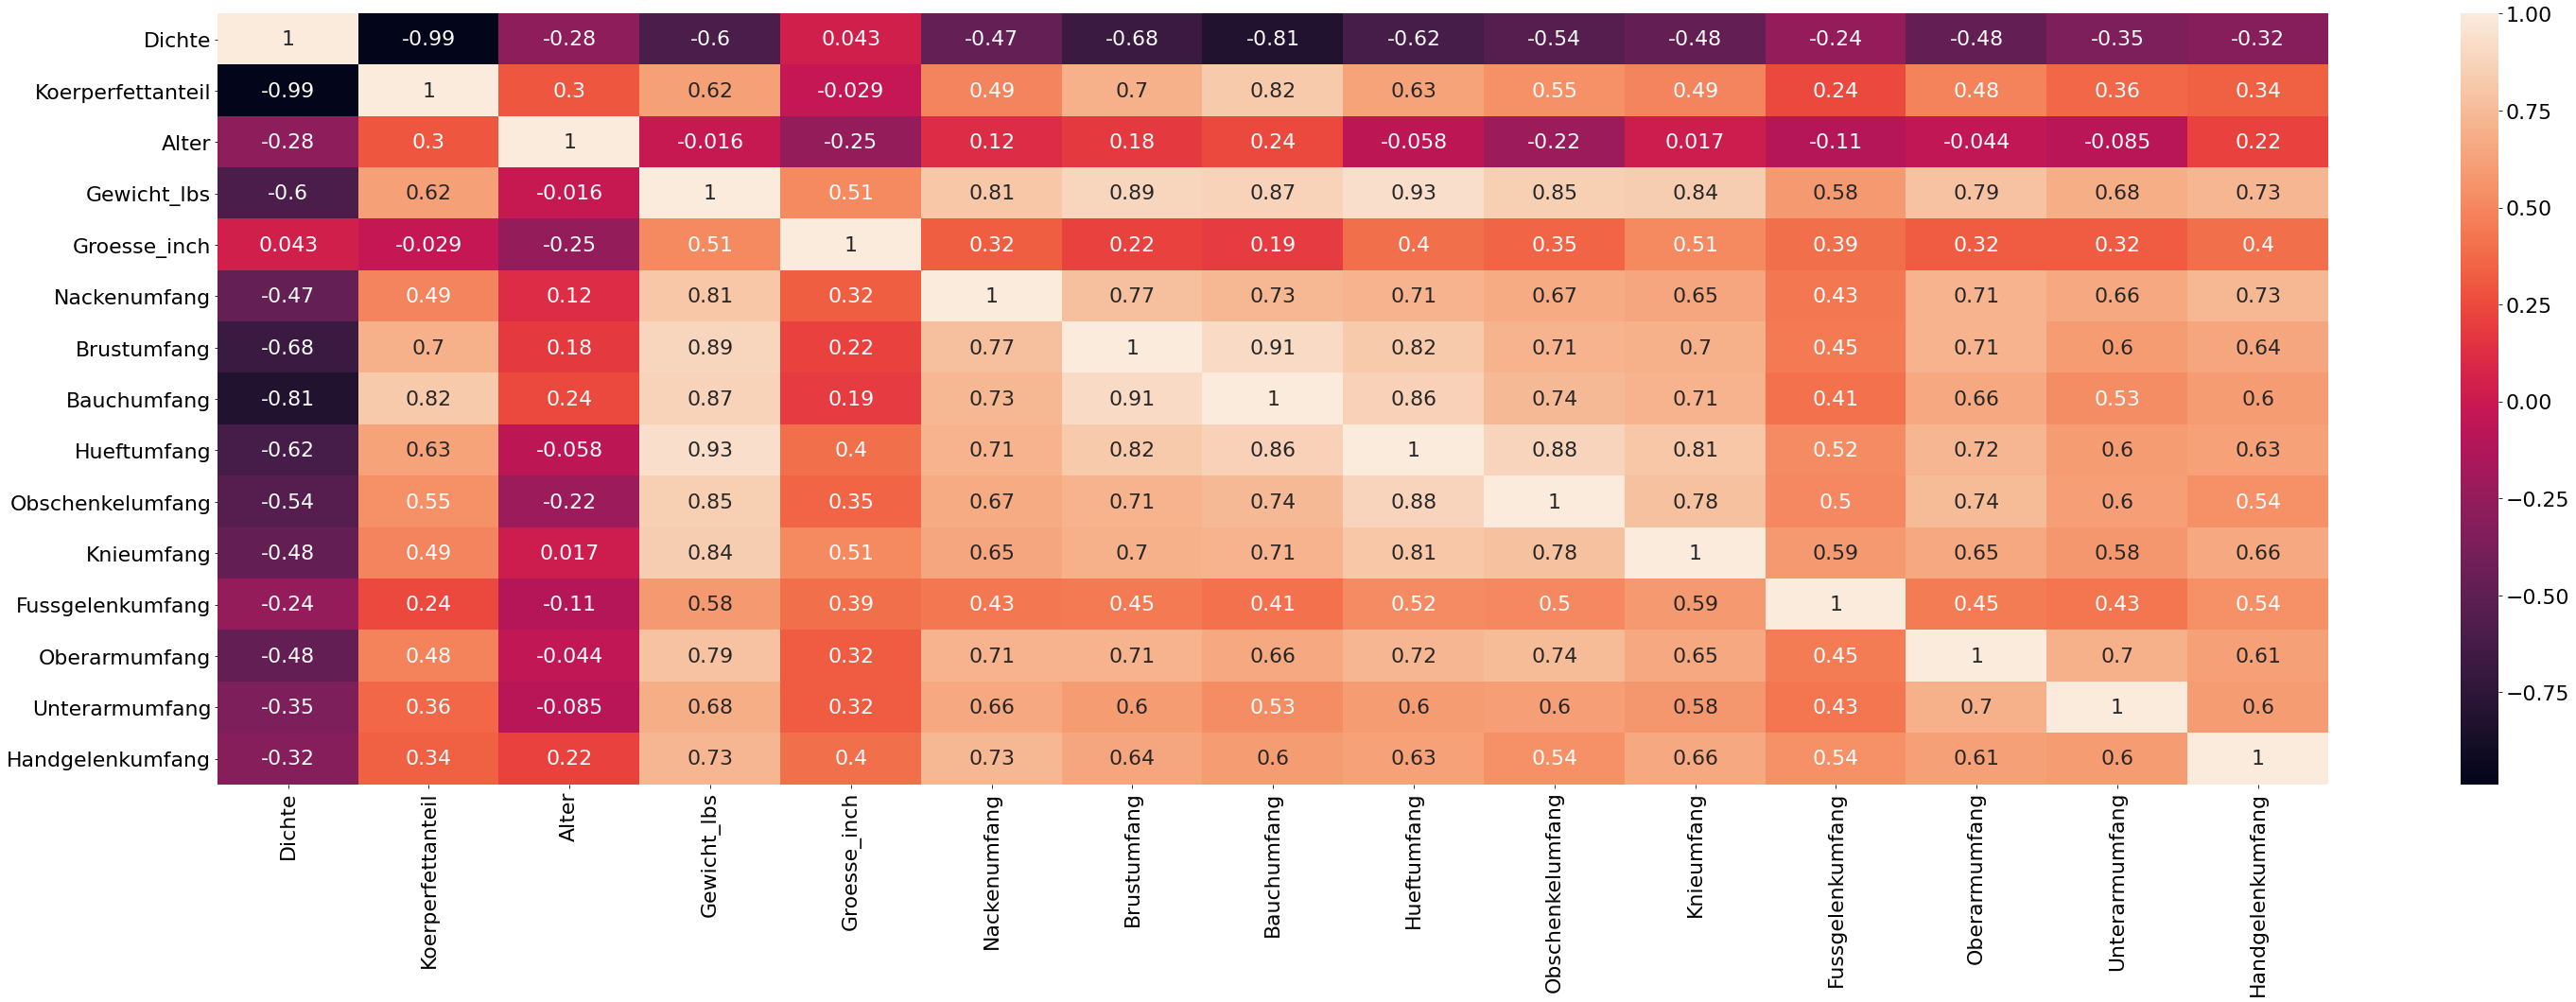

In [21]:
# Korrelationen als Heatmap anzeigen

import seaborn as sns

plt.figure(figsize=(50,15))
sns.heatmap(data_frame.corr(), annot=True)


In [22]:
correlation_sorted = data_frame.corr().abs().stack().sort_values(ascending=False, kind="quicksort").drop_duplicates()
print_full(correlation_sorted)

Handgelenkumfang   Handgelenkumfang                    1.00
Dichte             Koerperfettanteil                   0.99
Gewicht_lbs        Hueftumfang                         0.93
Bauchumfang        Brustumfang                         0.91
Gewicht_lbs        Brustumfang                         0.89
Obschenkelumfang   Hueftumfang                         0.88
Gewicht_lbs        Bauchumfang                         0.87
Bauchumfang        Hueftumfang                         0.86
Gewicht_lbs        Obschenkelumfang                    0.85
                   Knieumfang                          0.84
Brustumfang        Hueftumfang                         0.82
Bauchumfang        Koerperfettanteil                   0.82
Nackenumfang       Gewicht_lbs                         0.81
Knieumfang         Hueftumfang                         0.81
Dichte             Bauchumfang                         0.81
Gewicht_lbs        Oberarmumfang                       0.79
Knieumfang         Obschenkelumfang     

In [24]:
for i, val in correlation_sorted.items():
  if val < 0.75 or val == 1:
    correlation_sorted = correlation_sorted.drop(i)

print_full(correlation_sorted)

Dichte            Koerperfettanteil                   0.99
Gewicht_lbs       Hueftumfang                         0.93
Bauchumfang       Brustumfang                         0.91
Gewicht_lbs       Brustumfang                         0.89
Obschenkelumfang  Hueftumfang                         0.88
Gewicht_lbs       Bauchumfang                         0.87
Bauchumfang       Hueftumfang                         0.86
Gewicht_lbs       Obschenkelumfang                    0.85
                  Knieumfang                          0.84
Brustumfang       Hueftumfang                         0.82
Bauchumfang       Koerperfettanteil                   0.82
Nackenumfang      Gewicht_lbs                         0.81
Knieumfang        Hueftumfang                         0.81
Dichte            Bauchumfang                         0.81
Gewicht_lbs       Oberarmumfang                       0.79
Knieumfang        Obschenkelumfang                    0.78
Brustumfang       Nackenumfang                        0.